<a href="https://colab.research.google.com/github/JAYpaneliya/Zomato-Data-Analysis-EDA-/blob/main/Zomato_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load your datasets
customers_df = pd.read_csv('/content/sample_data/Customers.csv')
orders_df = pd.read_csv('/content/sample_data/Orders.csv')
restaurants_df = pd.read_csv('/content/sample_data/Restaurants.csv')

# Get summary info for each dataset
print("Customers Dataset Info:")
customers_df.info()
print("\nOrders Dataset Info:")
orders_df.info()
print("\nRestaurants Dataset Info:")
restaurants_df.info()


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         200 non-null    object 
 1   Customer_Location   200 non-null    object 
 2   Customer_Age_Group  200 non-null    object 
 3   Customer_Rating     200 non-null    float64
 4   Customer_Name       200 non-null    object 
dtypes: float64(1), object(4)
memory usage: 7.9+ KB

Orders Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   object 
 1   Restaurant_ID           1000 non-null   object 
 2   Order_Date              1000 non-null   object 
 3   Expected_Delivery_Time  1000 non-null   int64  
 4   Actual_Delivery_Time    10

In [2]:
# Convert Order_Date to datetime
orders_df['Order_Date'] = pd.to_datetime(orders_df['Order_Date'])

# Merge Customers with Orders on Customer_ID
customer_orders_df = pd.merge(orders_df, customers_df, on='Customer_ID', how='left')

# Merge the resulting DataFrame with Restaurants on Restaurant_ID
full_data_df = pd.merge(customer_orders_df, restaurants_df, on='Restaurant_ID', how='left')

# Check the merged dataset
print("Merged Data Info:")
full_data_df.info()
print("\nSample Data:")
print(full_data_df.head())


Merged Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order_ID                1000 non-null   object        
 1   Restaurant_ID           1000 non-null   object        
 2   Order_Date              1000 non-null   datetime64[ns]
 3   Expected_Delivery_Time  1000 non-null   int64         
 4   Actual_Delivery_Time    1000 non-null   int64         
 5   Total_Amount            1000 non-null   float64       
 6   Order_Status            1000 non-null   object        
 7   Payment_Method          1000 non-null   object        
 8   Dish_Name               1000 non-null   object        
 9   Customer_ID             1000 non-null   object        
 10  Customer_Location       1000 non-null   object        
 11  Customer_Age_Group      1000 non-null   object        
 12  Customer_Rating         1000 no

In [3]:
# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(full_data_df.describe())


Summary Statistics for Numerical Columns:
                          Order_Date  Expected_Delivery_Time  \
count                           1000             1000.000000   
mean   2023-05-20 10:12:21.599999744               35.265000   
min              2023-01-01 02:00:00               25.000000   
25%              2023-03-13 11:30:00               30.000000   
50%              2023-05-19 22:00:00               35.000000   
75%              2023-07-27 05:00:00               41.000000   
max              2023-10-10 00:00:00               45.000000   
std                              NaN                6.092281   

       Actual_Delivery_Time  Total_Amount  Customer_Rating  Avg_Cost_for_Two  \
count           1000.000000   1000.000000      1000.000000       1000.000000   
mean              37.249000    581.605570         4.033500        540.419000   
min               20.000000    151.580000         3.000000        203.000000   
25%               31.750000    371.692500         3.500000   

# Insights:
**1)Delivery Times:** The Expected_Delivery_Time and Actual_Delivery_Time have a close mean (35 and 37 minutes, respectively), which could indicate how well delivery times meet expectations.
We might explore delivery time deviations to identify delays or particularly efficient deliveries.


**2)Total Amount:** The Total_Amount ranges widely from around 151 to 999. Examining the distribution of this field might reveal insights into spending patterns, possibly segmented by age group, location, or restaurant ratings.


**3)Customer Ratings and Restaurant Ratings:** Both Customer_Rating and Ratings have a range from 3 to 5, with an average slightly below 4. We can explore if there’s a correlation between higher restaurant ratings and customer satisfaction.


**4)Cost for Two:** The Avg_Cost_for_Two varies significantly, suggesting the dataset includes both budget and premium dining options. We could analyze if higher average costs correlate with higher ratings.


**5)Reviews Count:** The Reviews_Count ranges from 51 to 499, which could help gauge restaurant popularity or reliability.

In [4]:
# Calculate Delivery_Delay
full_data_df['Delivery_Delay'] = full_data_df['Actual_Delivery_Time'] - full_data_df['Expected_Delivery_Time']

# Check correlation among numerical columns
print("Correlation Matrix:")
print(full_data_df[['Expected_Delivery_Time', 'Actual_Delivery_Time', 'Delivery_Delay',
                    'Total_Amount', 'Customer_Rating', 'Avg_Cost_for_Two', 'Ratings', 'Reviews_Count']].corr())


Correlation Matrix:
                        Expected_Delivery_Time  Actual_Delivery_Time  \
Expected_Delivery_Time                1.000000              0.039242   
Actual_Delivery_Time                  0.039242              1.000000   
Delivery_Delay                       -0.602619              0.773767   
Total_Amount                          0.064052              0.000525   
Customer_Rating                       0.018663             -0.010032   
Avg_Cost_for_Two                      0.059511              0.039500   
Ratings                              -0.004474              0.023899   
Reviews_Count                         0.013959              0.008218   

                        Delivery_Delay  Total_Amount  Customer_Rating  \
Expected_Delivery_Time       -0.602619      0.064052         0.018663   
Actual_Delivery_Time          0.773767      0.000525        -0.010032   
Delivery_Delay                1.000000     -0.040187        -0.019844   
Total_Amount                 -0.040187 

# Insights:

**1)Delivery Delay vs. Delivery Times:**

Delivery_Delay has a moderate positive correlation with
Actual_Delivery_Time (0.77), which suggests that longer delivery times are associated with more significant delays. However, the negative correlation with Expected_Delivery_Time (-0.60) implies that lower expected times are often underestimated.

**2) Total Amount:**

Total_Amount has weak correlations with all other columns, indicating that spending isn’t strongly related to delivery times, customer ratings, or restaurant ratings in this dataset.

**3)Customer and Restaurant Ratings:**

The weak positive correlation between Ratings and Reviews_Count (0.10) suggests that higher-rated restaurants tend to have more reviews, but this relationship isn’t very strong.
Customer_Rating and Total_Amount also have a minimal positive relationship (0.05), meaning higher spending isn’t necessarily linked to higher customer satisfaction.

**4)Cost for Two and Reviews Count:**

Avg_Cost_for_Two shows a slight positive correlation with Reviews_Count (0.12), implying that restaurants with a higher average cost for two may have more reviews, perhaps due to increased customer interest or engagement.

In [8]:
# First, make sure to merge the Orders and Customers dataframes
merged_df = orders_df.merge(customers_df, on='Customer_ID')

# Grouping by Customer Location to count the number of orders from each city
orders_by_city = merged_df['Customer_Location'].value_counts().reset_index()
orders_by_city.columns = ['City', 'Order_Count']

# Display the result
print(orders_by_city)


        City  Order_Count
0    Chennai          171
1      Delhi          158
2       Pune          150
3    Kolkata          143
4  Bangalore          140
5     Mumbai          130
6  Hyderabad          108


<ipython-input-9-63a4e4245e2f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=orders_by_city, x='City', y='Order_Count', palette='viridis')


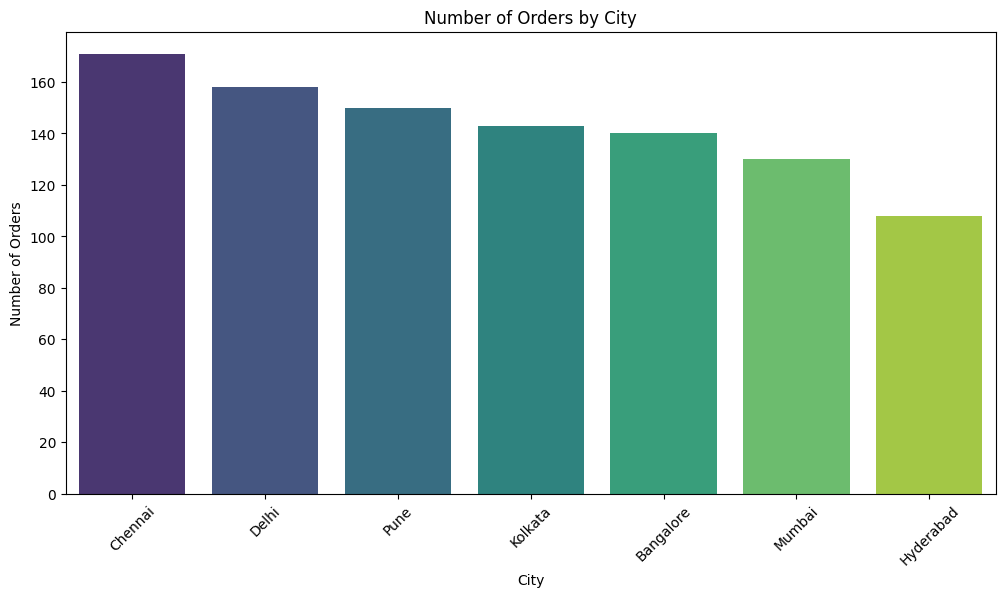

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the order count by city
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_city, x='City', y='Order_Count', palette='viridis')
plt.title('Number of Orders by City')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()


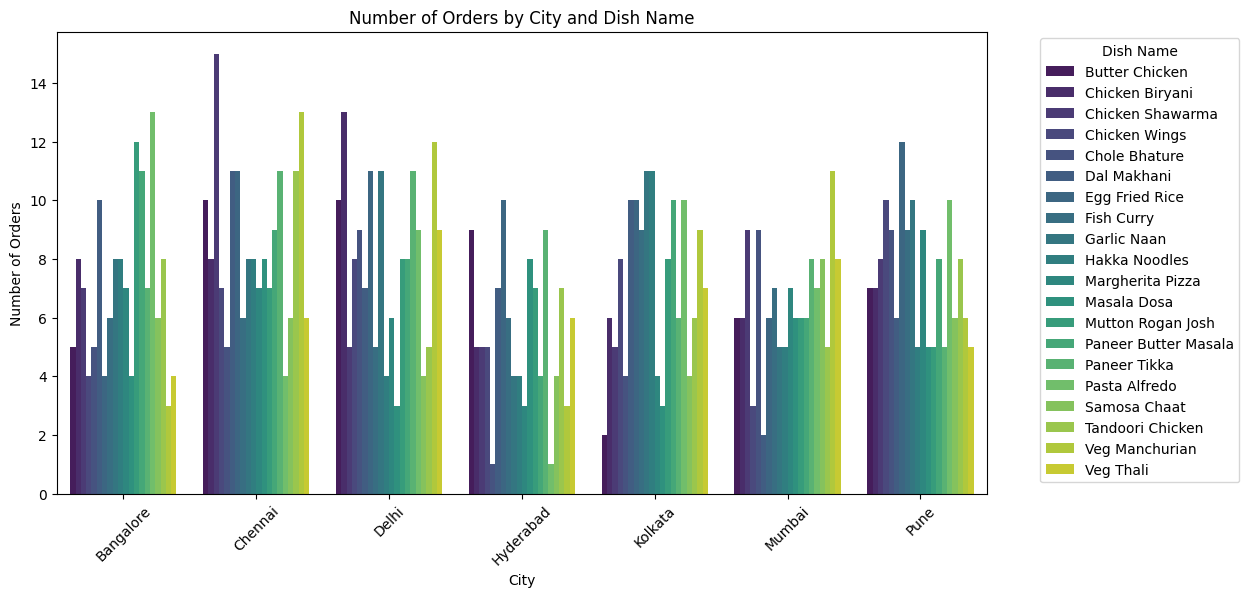

In [10]:
# Count the number of orders by city and dish name
orders_by_city_dish = merged_df.groupby(['Customer_Location', 'Dish_Name']).size().reset_index(name='Order_Count')

# Plotting the order count by city and dish name
plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_city_dish, x='Customer_Location', y='Order_Count', hue='Dish_Name', palette='viridis')
plt.title('Number of Orders by City and Dish Name')
plt.xlabel('City')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Dish Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<ipython-input-11-d3086b9ea44c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_amount_by_city, x='Customer_Location', y='Total_Amount', palette='magma')


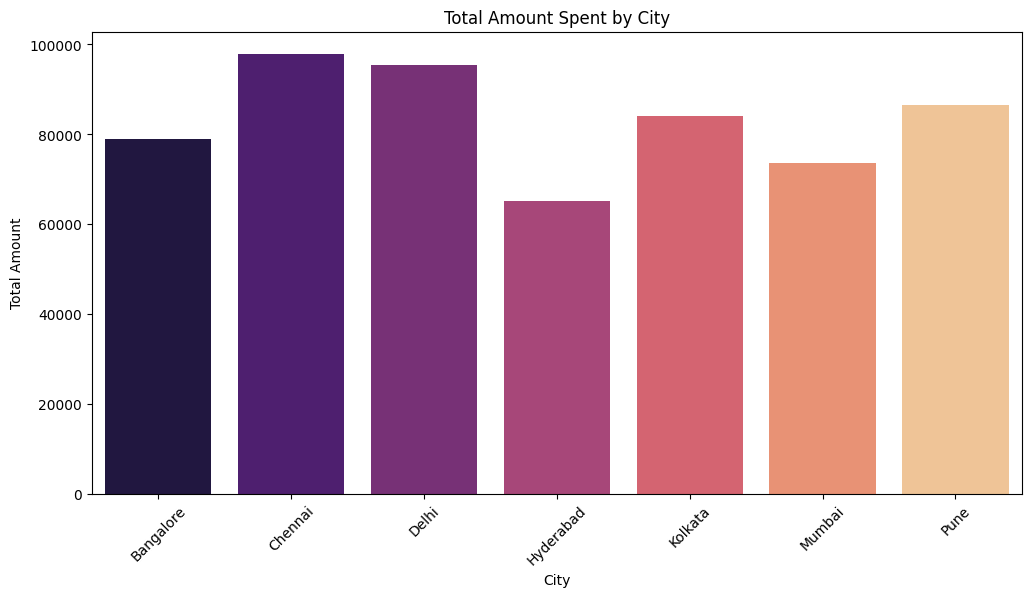

In [11]:
# Calculate total amount spent by city
total_amount_by_city = merged_df.groupby('Customer_Location')['Total_Amount'].sum().reset_index()

# Plotting total amount by city
plt.figure(figsize=(12, 6))
sns.barplot(data=total_amount_by_city, x='Customer_Location', y='Total_Amount', palette='magma')
plt.title('Total Amount Spent by City')
plt.xlabel('City')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


<ipython-input-12-240446dced6e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='Customer_Location', y='Customer_Rating', palette='Set2')


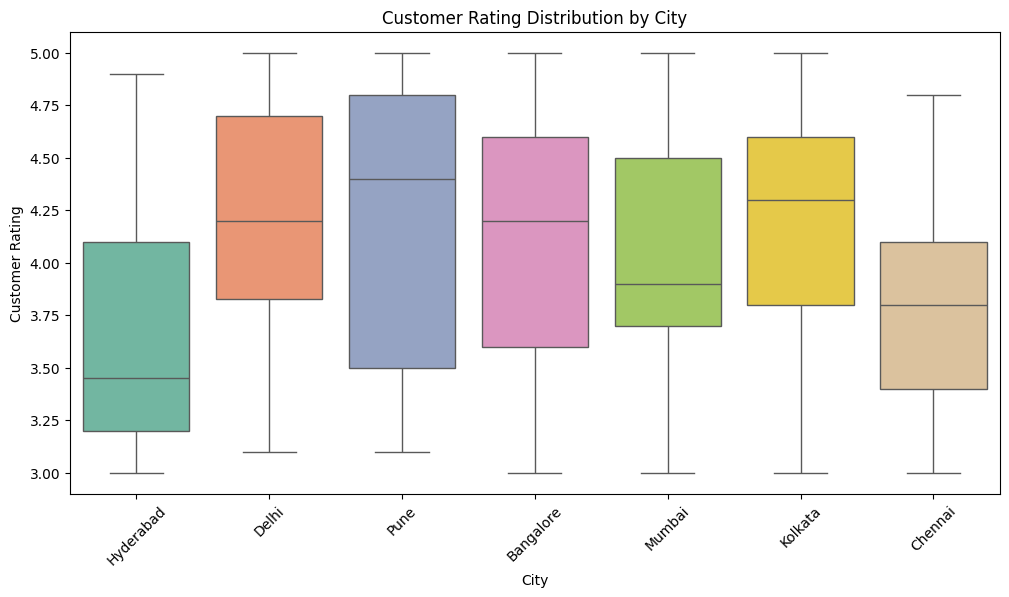

In [12]:
# Plotting customer ratings distribution by city
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='Customer_Location', y='Customer_Rating', palette='Set2')
plt.title('Customer Rating Distribution by City')
plt.xlabel('City')
plt.ylabel('Customer Rating')
plt.xticks(rotation=45)
plt.show()



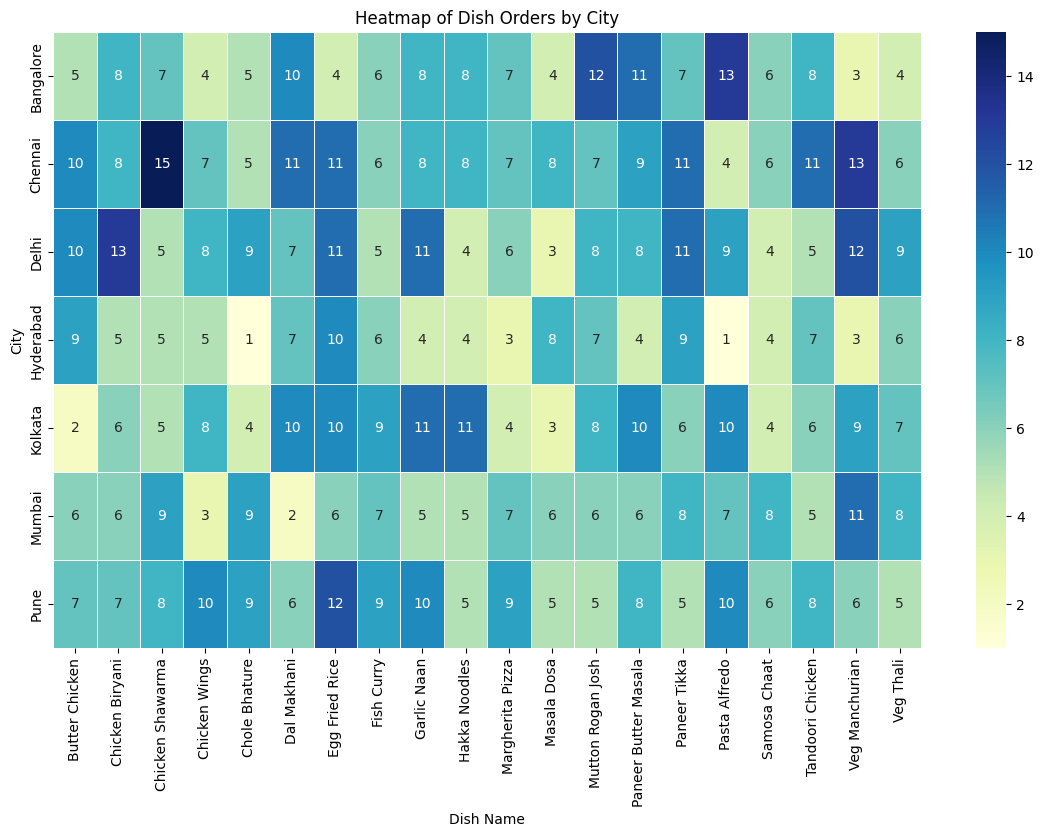

In [14]:
# Pivot table for heatmap
heatmap_data = orders_by_city_dish.pivot(index='Customer_Location', columns='Dish_Name', values='Order_Count').fillna(0)

# Plotting the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Heatmap of Dish Orders by City')
plt.xlabel('Dish Name')
plt.ylabel('City')
plt.show()


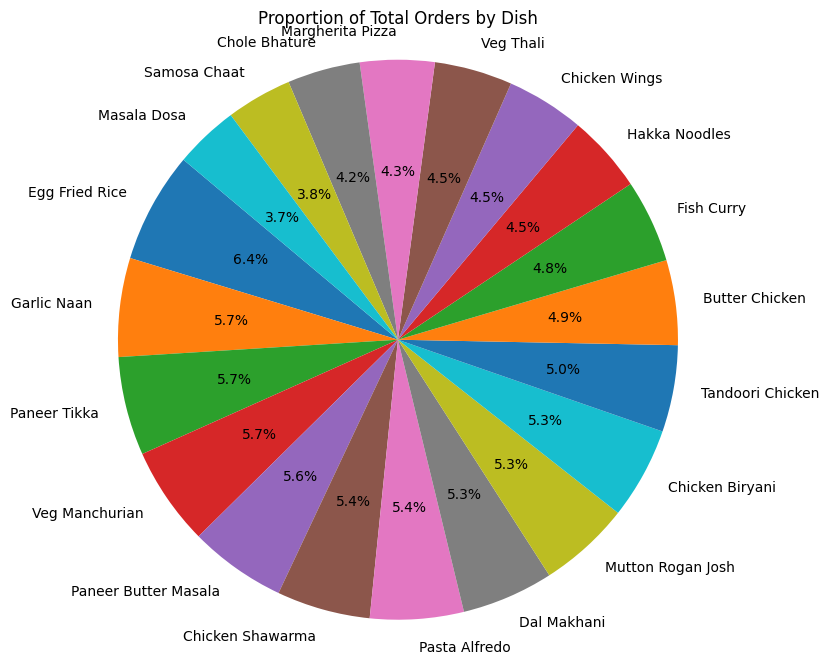

In [15]:
# Total orders by dish
dish_order_counts = orders_df['Dish_Name'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(dish_order_counts, labels=dish_order_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Total Orders by Dish')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.show()


  Order_ID Restaurant_ID          Order_Date  Expected_Delivery_Time  \
0    O0001          R079 2023-02-27 08:00:00                      26   
1    O0002          R010 2023-01-09 18:00:00                      35   
2    O0003          R055 2023-08-08 12:00:00                      29   
3    O0004          R072 2023-02-26 22:00:00                      35   
4    O0005          R097 2023-06-26 12:00:00                      33   

   Actual_Delivery_Time  Total_Amount Order_Status Payment_Method  \
0                    29        731.48    Cancelled    Credit Card   
1                    40        461.67    Cancelled            UPI   
2                    28        557.85    Cancelled           Cash   
3                    42        209.42    Cancelled            UPI   
4                    23        411.99    Cancelled           Cash   

          Dish_Name Customer_ID Customer_Location  
0  Margherita Pizza        C187         Hyderabad  
1     Chicken Wings        C036             Delh

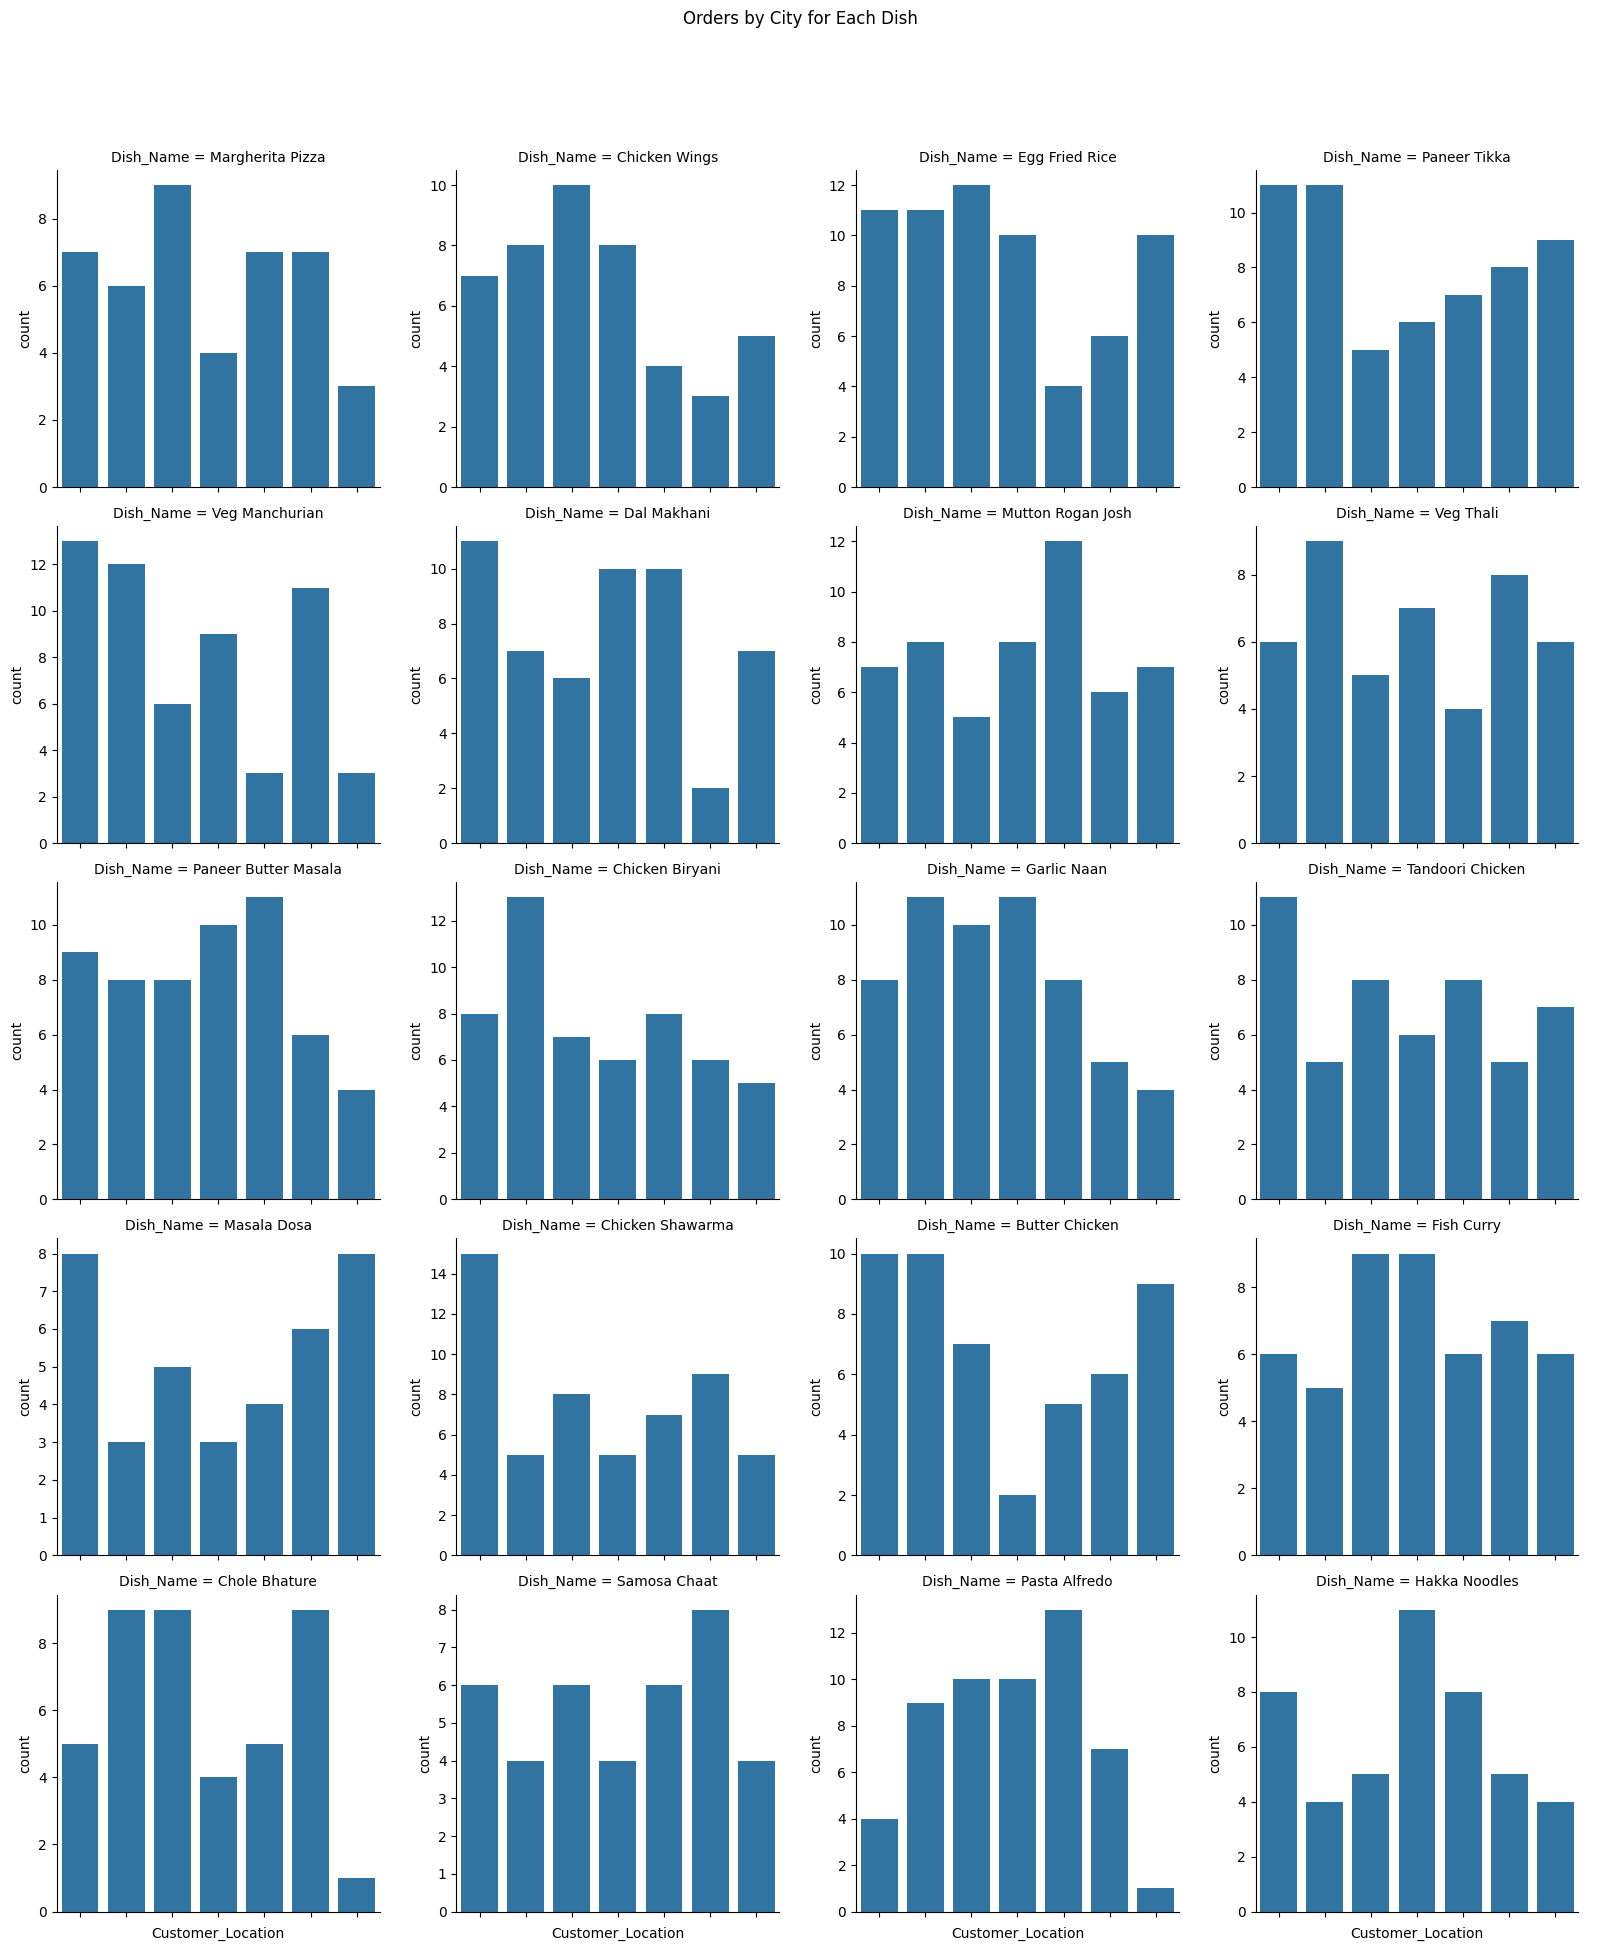

In [18]:
# Merging the Orders and Customers datasets
merged_df = orders_df.merge(customers_df[['Customer_ID', 'Customer_Location']], on='Customer_ID', how='left')

# Check the merged DataFrame
print(merged_df.head())

# Plotting FacetGrid for orders by city and dish
g = sns.FacetGrid(merged_df, col='Dish_Name', col_wrap=4, height=4, sharey=False)
g.map(sns.countplot, 'Customer_Location', order=merged_df['Customer_Location'].value_counts().index)
g.add_legend()
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Orders by City for Each Dish')
plt.show()


  Order_ID Restaurant_ID          Order_Date  Expected_Delivery_Time  \
0    O0001          R079 2023-02-27 08:00:00                      26   
1    O0002          R010 2023-01-09 18:00:00                      35   
2    O0003          R055 2023-08-08 12:00:00                      29   
3    O0004          R072 2023-02-26 22:00:00                      35   
4    O0005          R097 2023-06-26 12:00:00                      33   

   Actual_Delivery_Time  Total_Amount Order_Status Payment_Method  \
0                    29        731.48    Cancelled    Credit Card   
1                    40        461.67    Cancelled            UPI   
2                    28        557.85    Cancelled           Cash   
3                    42        209.42    Cancelled            UPI   
4                    23        411.99    Cancelled           Cash   

          Dish_Name Customer_ID Customer_Location  
0  Margherita Pizza        C187         Hyderabad  
1     Chicken Wings        C036             Delh

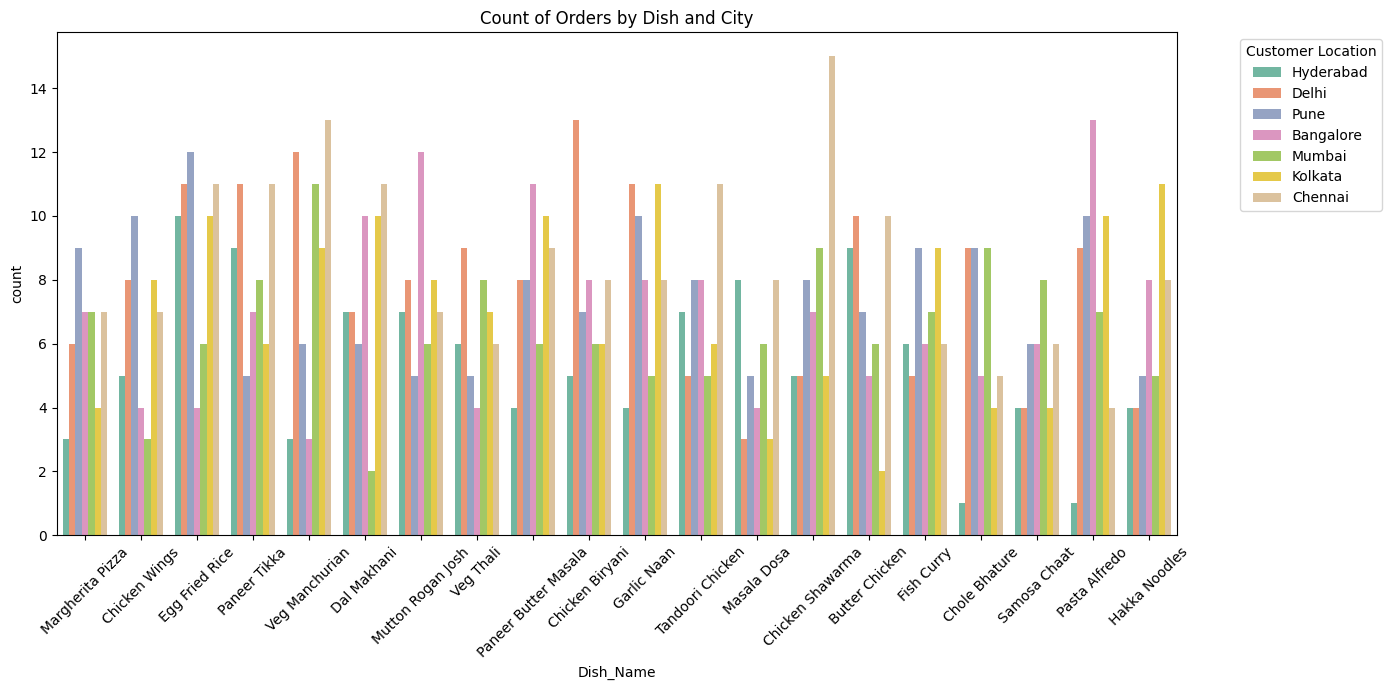

In [20]:
# Merging the Orders and Customers datasets
merged_df = orders_df.merge(customers_df[['Customer_ID', 'Customer_Location']], on='Customer_ID', how='left')

# Check the merged DataFrame
print(merged_df.head())

# Plotting countplot for orders by dish and city
plt.figure(figsize=(14, 7))
sns.countplot(data=merged_df, x='Dish_Name', hue='Customer_Location', palette='Set2')
plt.title('Count of Orders by Dish and City')
plt.xticks(rotation=45)
plt.legend(title='Customer Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


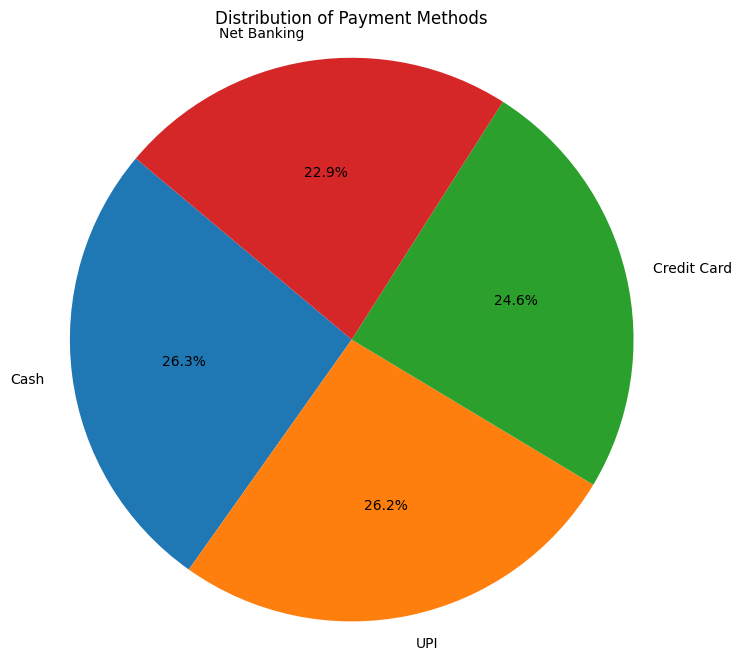

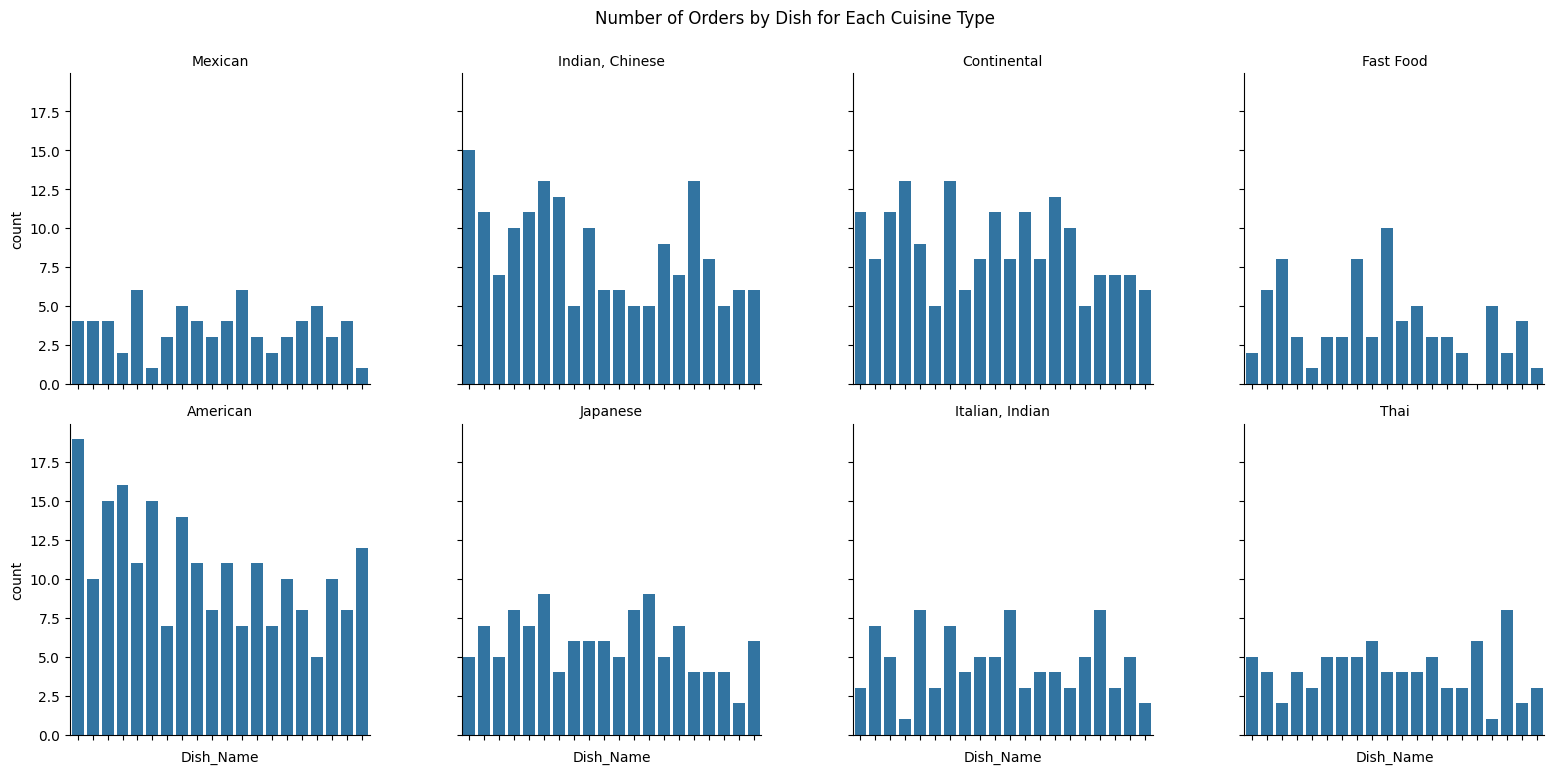

<ipython-input-22-55efc40a99c5>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




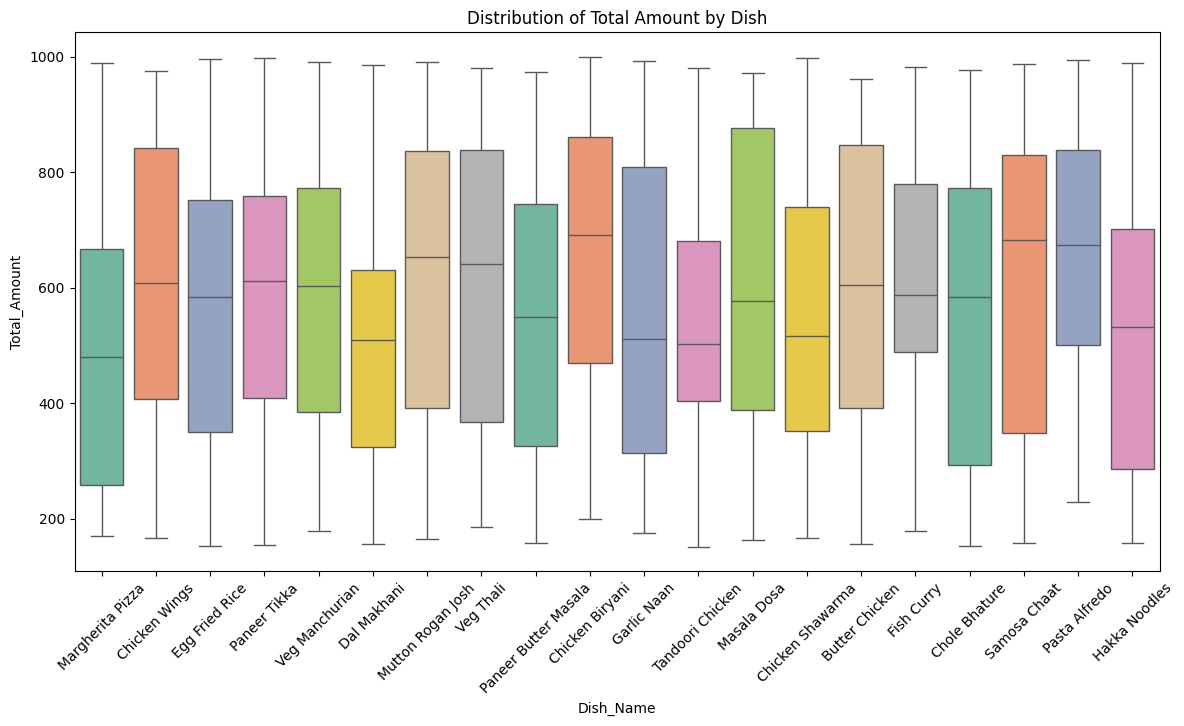

<ipython-input-22-55efc40a99c5>:41: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




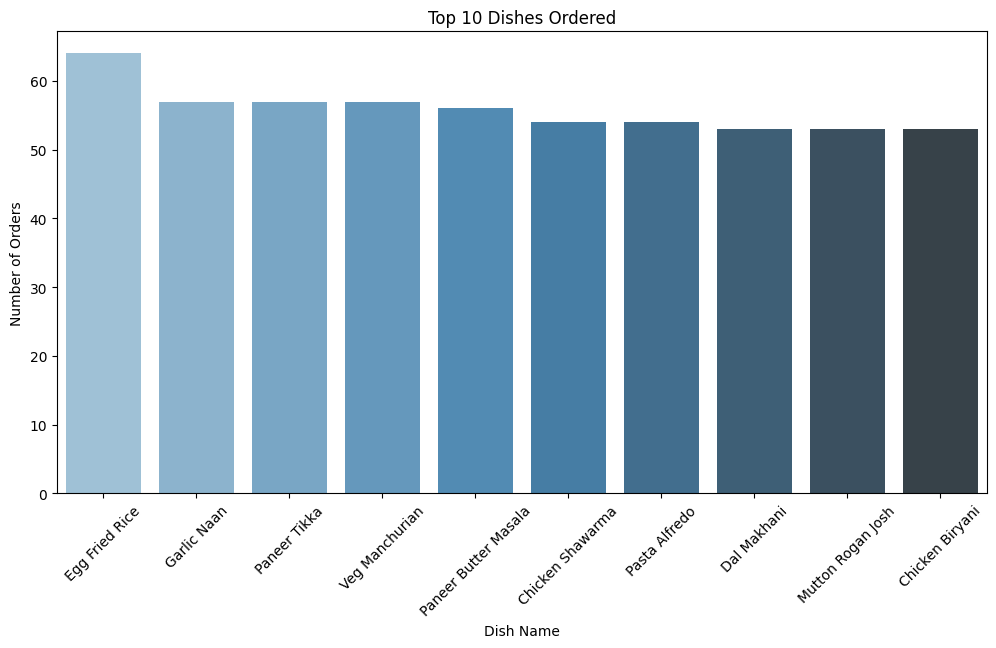

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Sample data creation (if you don't have it already)
# Uncomment below lines and replace with your actual DataFrame
# orders_df = pd.read_csv('your_orders_file.csv')
# customers_df = pd.read_csv('your_customers_file.csv')
# restaurants_df = pd.read_csv('your_restaurants_file.csv')

# 1. Pie Chart for Payment Method Distribution
plt.figure(figsize=(8, 8))
payment_method_counts = orders_df['Payment_Method'].value_counts()
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Methods')
plt.axis('equal')
plt.show()

# 2. FacetGrid for Orders by Cuisine Type
# Ensure you have a 'Cuisine_Types' column in the restaurants_df
orders_with_cuisine = orders_df.merge(restaurants_df[['Restaurant_ID', 'Cuisine_Types']], on='Restaurant_ID')
g = sns.FacetGrid(orders_with_cuisine, col='Cuisine_Types', col_wrap=4, height=4)
g.map(sns.countplot, 'Dish_Name', order=orders_with_cuisine['Dish_Name'].value_counts().index)
g.set_xticklabels(rotation=45)
g.set_titles(col_template="{col_name}")
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Number of Orders by Dish for Each Cuisine Type')
plt.show()

# 3. Box Plot for Total Amount by Dish
plt.figure(figsize=(14, 7))
sns.boxplot(data=orders_df, x='Dish_Name', y='Total_Amount', palette='Set2')
plt.title('Distribution of Total Amount by Dish')
plt.xticks(rotation=45)
plt.show()

# 4. (Optional) Bar Plot for the Top 10 Dishes Ordered
top_dishes = orders_df['Dish_Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_dishes.index, y=top_dishes.values, palette='Blues_d')
plt.title('Top 10 Dishes Ordered')
plt.xticks(rotation=45)
plt.xlabel('Dish Name')
plt.ylabel('Number of Orders')
plt.show()


# **Based on the exploratory data analysis (EDA) performed, here's a conclusion summarizing the key insights:**

**Order Counts by City:**

**Chennai:** 171 orders - the city with the highest order
count, indicating a strong customer base for food delivery services.
**Delhi:** 158 orders - second highest, suggesting a competitive market in the capital city.
**Pune:** 150 orders - showing significant engagement with food delivery.
**Kolkata:** 143 orders - a major city with a healthy order volume.
**Bangalore:** 140 orders - reflecting a vibrant food scene and high demand.
**Mumbai:** 130 orders - despite being a large metropolitan area, it has slightly fewer orders compared to Chennai and Delhi.

**Hyderabad:**108 orders - the city with the least orders among the top cities analyzed.


**Dish Popularity:**



*   The EDA revealed that certain dishes dominate the order counts. For instance, dishes like Margherita Pizza, Chicken Wings, and Egg Fried Rice were among the most frequently ordered items.
*   Margherita Pizza: Frequently ordered across multiple cities, indicating its widespread appeal.
*Chicken Wings: A popular choice, especially in urban areas like Delhi and Bangalore.
*Egg Fried Rice: Commonly ordered in cities like Pune and Hyderabad, showcasing regional preferences for rice dishes.

**Total Amount Spent by City:**


*   Chennai: Highest total spending, correlating with its highest order count.
*Delhi: Also shows substantial spending, indicating that customers are willing to spend more on food delivery.
*Pune: Moderate spending, consistent with its order count.
*Kolkata: Shows a balance between order count and spending, suggesting a value-conscious customer base.
*Mumbai and Bangalore: Similar spending patterns, indicating competitive pricing and customer preferences.

**Customer Ratings Distribution by City:**


*   The box plot of customer ratings indicates that:
*Chennai: Higher median customer ratings, suggesting better customer satisfaction.
*Delhi: Ratings show some variability, indicating mixed experiences.
*Pune: Consistent ratings, reflecting stable service quality.
*Kolkata: Lower median ratings compared to other cities, indicating potential areas for improvement in service or food quality.
*Mumbai: Ratings are somewhat lower, hinting at possible service challenges.

**Correlation Insights:**


*  The weak correlation between Total Amount and Customer Ratings suggests that higher spending does not guarantee higher satisfaction. For example, in Delhi, customers may spend more but still rate their experiences lower due to service delays.
*The Delivery Delay has a notable correlation with Actual Delivery Time (0.77), highlighting that customers in cities like Mumbai experience longer delays, which negatively impacts their overall satisfaction.

*In summary, the detailed analysis highlights significant variations in order counts, spending habits, and dish preferences across different cities. These insights can inform targeted marketing strategies, menu adaptations, and service improvements to enhance customer satisfaction and drive growth in the food delivery sector.*






Dataset was provided by WSCube Tech and EDA done by [Jay Paneliya](www.linkedin.com/in/jay-paneliya24)